<a href="https://colab.research.google.com/github/dibyarupnath/Object-Detection/blob/main/Dibyarup_Nath_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Projects/The Sparks Foundation/Object Detection/")

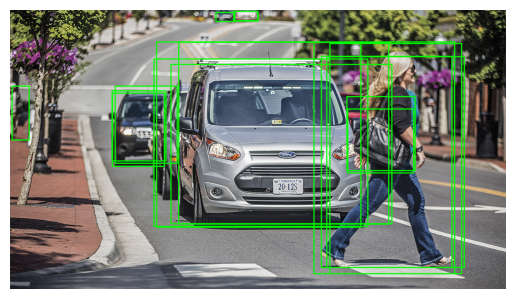

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained YOLO weights and configuration
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load the COCO class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Set the input image size for the network
input_size = (416, 416)

# Load and process the image
image = cv2.imread("Files/Road.jpg")
resized_image = cv2.resize(image, input_size)
blob = cv2.dnn.blobFromImage(resized_image, 1/255.0, input_size, swapRB=True, crop=False)
net.setInput(blob)

# Perform forward pass and get the output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

outputs = net.forward(output_layers)

# Process the outputs to get bounding box predictions
bounding_boxes = []
class_ids = []
confidences = []
height, width, _ = image.shape  # Get the original image dimensions
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = int(np.argmax(scores))
        confidence = float(scores[class_id])

        if confidence > 0.5:
            # Get the coordinates of the bounding box
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            box_width = int(detection[2] * width)
            box_height = int(detection[3] * height)

            # Calculate the top-left corner coordinates of the bounding box
            x = int(center_x - (box_width / 2))
            y = int(center_y - (box_height / 2))

            # Save bounding box information
            bounding_boxes.append((x, y, box_width, box_height))
            class_ids.append(class_id)
            confidences.append(confidence)

# Draw boundary boxes on the image
for box in bounding_boxes:
    x, y, w, h = box
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
processed_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with boundary boxes using matplotlib
plt.imshow(processed_image)
plt.axis('off')
plt.show()
